In [101]:
import requests as r 
import pandas as pd
from bs4 import BeautifulSoup

In [198]:
url_headers = {'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight=' : """Accept: application/json, text/plain, */*
Accept-Encoding: gzip, deflate, br
Accept-Language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
Connection: keep-alive
Cookie: AMCV_7FF852E2556756057F000101%40AdobeOrg=2121618341%7CMCIDTS%7C18347%7CMCMID%7C60079347227900325221758632164973373537; _ga=GA1.2.82276269.1599558208; countryCode=FR; AAMC_nba_0=REGION%7C6; OptanonAlertBoxClosed=2020-09-08T09:43:35.215Z; s_fid=48FF315B4E458EAB-1AC3336634232438; OptanonControl=ccc=undefined&otvers=6.3.0&reg=global&vers=1.3.3; adobeujs-optin=%7B%22aam%22%3Atrue%2C%22adcloud%22%3Afalse%2C%22aa%22%3Atrue%2C%22campaign%22%3Afalse%2C%22ecid%22%3Atrue%2C%22livefyre%22%3Afalse%2C%22target%22%3Afalse%2C%22mediaaa%22%3Atrue%7D; AMCVS_248F210755B762187F000101%40AdobeOrg=1; s_cc=true; s_vi=[CS]v1|2FABA9260515EF47-600007CB52F62D81[CE]; s_ecid=MCMID%7C60079347227900325221758632164973373537; AMCVS_7FF852E2556756057F000101%40AdobeOrg=1; aam_uuid=60121375025852238611758925421721130590; _gid=GA1.2.59332361.1600094429; _gat=1; AMCV_248F210755B762187F000101%40AdobeOrg=870038026%7CMCIDTS%7C18520%7CMCMID%7C07369984966384107306692990342177339477%7CMCAID%7CNONE%7CMCOPTOUT-1600101630s%7CNONE%7CvVersion%7C5.0.0%7CMCAAMLH-1600699230%7C6%7CMCAAMB-1600699230%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI; kw.session_ts=1600094432711; _sp_ses.7005=*; ak_bmsc=3A130AF1691491DB6FE63173FEB571FC5C7BEC04F77F0000ED805F5F36A18E15~pllHcHegNz+u+R8jc6A6S2evhAjVa3iXGHBQtnfo8YUm6aaPbIU/Hh1kP7pGqSqWL8xUta7a6CTSOYXf6MIi6JAbDBUQb7eVdF8UI2kRrAM3YZyK10Ulrj+tvSQNU5i7pZkA+OdrJavxc0t39Nyt0RlFESoBt7xiUDdpMFAbazvXNmsaFno3cG9FYcGXzEbrF/zGx68b2qCN6L0QeRkVz3nZ3hiBgOeMoeo61vKqe7EEGBYYcF0zI7Uj47K0QdmOFk; AMCV_7FF852E2556756057F000101%40AdobeOrg=1585540135%7CMCIDTS%7C18520%7CMCMID%7C60079347227900325221758632164973373537%7CMCAID%7C2FABA9260515EF47-600007CB52F62D81%7CMCAAMLH-1600699249%7C6%7CMCAAMB-1600699249%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI%7CMCOPTOUT-1600101649s%7CNONE%7CvVersion%7C4.4.0; gpv_pn=stats%3Aplayers%3Atraditional; s_sq=%5B%5BB%5D%5D; kw.pv_session=2; _sp_id.7005=5240a3dd-0413-4633-a845-ad70e3f86be8.1599558210.16.1600094450.1599838423.435803e3-2129-4589-8ef4-8d94ea112700; OptanonConsent=isIABGlobal=true&datestamp=Mon+Sep+14+2020+16%3A40%3A50+GMT%2B0200+(heure+d%E2%80%99%C3%A9t%C3%A9+d%E2%80%99Europe+centrale)&version=6.3.0&consentId=ee261f18-446f-4b6a-a298-5a68e611af58&interactionCount=1&landingPath=NotLandingPage&groups=adv%3A1%2Cad%3A1%2CBG40%3A1%2Cpfv%3A1%2Cpf%3A1%2CBG36%3A1%2Csa%3A1%2CBG42%3A1%2Creq%3A1%2Csmv%3A1%2Csm%3A1%2CBG32%3A1%2Cpz%3A1%2Cpzv%3A1%2CBG37%3A1%2Cbb%3A1%2Cbbv%3A1%2CBG41%3A1%2Csav%3A1%2CBG39%3A1&hosts=&geolocation=FR%3BIDF&AwaitingReconsent=false; bm_sv=CA4633B8126B0CAF0B666F16AD015187~LjLV65EQhhg+/dkslzjZX1UIDl5xpqxHB3Eu8+ltJ1ttUfWJt0UQDrxKxU/5gywfdR/n+4ZV7dOgeCRsvGP1HEfbkBxALilZcFR84Am5e6YKvN6fEZXfTM3WyStrZKaAdSxBULAT9aXrDvFJ9dkehQ==; s_tp=2615; s_ppv=stats%253Aplayers%253Atraditional%2C29%2C29%2C766; s_tps=18; s_pvs=30
Host: stats.nba.com
Referer: https://stats.nba.com/players/traditional/?sort=PTS&dir=-1&Season=2019-20&SeasonType=Regular%20Season
Sec-Fetch-Dest: empty
Sec-Fetch-Mode: cors
Sec-Fetch-Site: same-origin
User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36
x-nba-stats-origin: stats
x-nba-stats-token: true
X-NewRelic-ID: VQECWF5UChAHUlNTBwgBVw=="""    
}

In [199]:
def get_stats(url):
    
    headers=dict([i.strip().split(': ') for i in url_headers[url].split('\n')])
    resp=r.get(url, headers=headers)
    stats=pd.DataFrame(resp.json()['resultSets'][0]['rowSet'], columns=resp.json()['resultSets'][0]['headers']).loc[:,:'PLUS_MINUS']
    
    return stats

def add_bios(df):

    url_bios = 'https://stats.nba.com/stats/leaguedashplayerbiostats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='
    headers = """Accept: application/json, text/plain, */*
Accept-Encoding: gzip, deflate, br
Accept-Language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
Connection: keep-alive
Cookie: AMCV_7FF852E2556756057F000101%40AdobeOrg=2121618341%7CMCIDTS%7C18347%7CMCMID%7C60079347227900325221758632164973373537; _ga=GA1.2.82276269.1599558208; countryCode=FR; AAMC_nba_0=REGION%7C6; OptanonAlertBoxClosed=2020-09-08T09:43:35.215Z; s_fid=48FF315B4E458EAB-1AC3336634232438; OptanonControl=ccc=undefined&otvers=6.3.0&reg=global&vers=1.3.3; adobeujs-optin=%7B%22aam%22%3Atrue%2C%22adcloud%22%3Afalse%2C%22aa%22%3Atrue%2C%22campaign%22%3Afalse%2C%22ecid%22%3Atrue%2C%22livefyre%22%3Afalse%2C%22target%22%3Afalse%2C%22mediaaa%22%3Atrue%7D; AMCVS_248F210755B762187F000101%40AdobeOrg=1; s_cc=true; s_vi=[CS]v1|2FABA9260515EF47-600007CB52F62D81[CE]; s_ecid=MCMID%7C60079347227900325221758632164973373537; AMCVS_7FF852E2556756057F000101%40AdobeOrg=1; aam_uuid=60121375025852238611758925421721130590; _gid=GA1.2.59332361.1600094429; AMCV_248F210755B762187F000101%40AdobeOrg=870038026%7CMCIDTS%7C18520%7CMCMID%7C07369984966384107306692990342177339477%7CMCAID%7CNONE%7CMCOPTOUT-1600101630s%7CNONE%7CvVersion%7C5.0.0%7CMCAAMLH-1600699230%7C6%7CMCAAMB-1600699230%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI; kw.session_ts=1600094432711; _sp_ses.7005=*; ak_bmsc=3A130AF1691491DB6FE63173FEB571FC5C7BEC04F77F0000ED805F5F36A18E15~pllHcHegNz+u+R8jc6A6S2evhAjVa3iXGHBQtnfo8YUm6aaPbIU/Hh1kP7pGqSqWL8xUta7a6CTSOYXf6MIi6JAbDBUQb7eVdF8UI2kRrAM3YZyK10Ulrj+tvSQNU5i7pZkA+OdrJavxc0t39Nyt0RlFESoBt7xiUDdpMFAbazvXNmsaFno3cG9FYcGXzEbrF/zGx68b2qCN6L0QeRkVz3nZ3hiBgOeMoeo61vKqe7EEGBYYcF0zI7Uj47K0QdmOFk; _gat=1; AMCV_7FF852E2556756057F000101%40AdobeOrg=1585540135%7CMCIDTS%7C18520%7CMCMID%7C60079347227900325221758632164973373537%7CMCAID%7C2FABA9260515EF47-600007CB52F62D81%7CMCAAMLH-1600699377%7C6%7CMCAAMB-1600699377%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI%7CMCOPTOUT-1600101777s%7CNONE%7CvVersion%7C4.4.0; gpv_pn=stats%3Aplayers%3Abio; s_sq=%5B%5BB%5D%5D; kw.pv_session=4; _sp_id.7005=5240a3dd-0413-4633-a845-ad70e3f86be8.1599558210.16.1600094579.1599838423.435803e3-2129-4589-8ef4-8d94ea112700; OptanonConsent=isIABGlobal=true&datestamp=Mon+Sep+14+2020+16%3A42%3A59+GMT%2B0200+(heure+d%E2%80%99%C3%A9t%C3%A9+d%E2%80%99Europe+centrale)&version=6.3.0&consentId=ee261f18-446f-4b6a-a298-5a68e611af58&interactionCount=1&landingPath=NotLandingPage&groups=adv%3A1%2Cad%3A1%2CBG40%3A1%2Cpfv%3A1%2Cpf%3A1%2CBG36%3A1%2Csa%3A1%2CBG42%3A1%2Creq%3A1%2Csmv%3A1%2Csm%3A1%2CBG32%3A1%2Cpz%3A1%2Cpzv%3A1%2CBG37%3A1%2Cbb%3A1%2Cbbv%3A1%2CBG41%3A1%2Csav%3A1%2CBG39%3A1&hosts=&geolocation=FR%3BIDF&AwaitingReconsent=false; bm_sv=CA4633B8126B0CAF0B666F16AD015187~LjLV65EQhhg+/dkslzjZX1UIDl5xpqxHB3Eu8+ltJ1ttUfWJt0UQDrxKxU/5gywfdR/n+4ZV7dOgeCRsvGP1HEfbkBxALilZcFR84Am5e6YiLNWbywL0x3qtN4Iitgk+1P61SVyUmyahR4+QxuWv0g==; s_tp=2627; s_ppv=stats%253Aplayers%253Abio%2C29%2C29%2C766; s_tps=12; s_pvs=21
Host: stats.nba.com
Referer: https://stats.nba.com/players/bio/?Season=2019-20&SeasonType=Regular%20Season
Sec-Fetch-Dest: empty
Sec-Fetch-Mode: cors
Sec-Fetch-Site: same-origin
User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36
x-nba-stats-origin: stats
x-nba-stats-token: true
X-NewRelic-ID: VQECWF5UChAHUlNTBwgBVw=="""
    headers=dict([i.strip().split(': ') for i in headers.split('\n')])
    
    respo=r.get(url_bios, headers=headers)
    
    bios=pd.DataFrame(respo.json()['resultSets'][0]['rowSet'], columns=respo.json()['resultSets'][0]['headers']).loc[:,:'DRAFT_NUMBER']
    
    merge=bios.merge(df.drop(columns=['PLAYER_NAME','TEAM_ID','TEAM_ABBREVIATION','AGE']),how='left',on='PLAYER_ID')
    
    return merge

def add_2k(df):
    
    url_2k="https://nba2kw.com/list/nba-2k20-all-player-ratings/"
    ress=r.get(url_2k).content
    soup=BeautifulSoup(ress)
    stats_2k=pd.DataFrame([[j.text for j in i] for i in soup.select('tbody tr')], columns=['2K_'+i.text.upper() for i in soup.select('thead tr th')]).drop(columns=['2K_TEAM','2K_POS.','2K_HEIGHT'])
    stats_2k.rename(columns={'2K_PLAYER':'PLAYER_NAME'},inplace=True)
    
    merge=df.merge(stats_2k,how='left',on='PLAYER_NAME')
    
    return merge

def add_sal(df):
    
    url_sal="https://www.basketball-reference.com/contracts/players.html"
    re=r.get(url_sal).content
    soup=BeautifulSoup(re)
    
    data_sal=[i.text for i in soup.select('tbody tr [data-stat=player],[data-stat=y1]')][1:]
    data_sal=[(i+j).split('$') for i,j in zip(data_sal[::2], data_sal[1::2])]
    dfs=pd.DataFrame(data_sal,columns=['PLAYER_NAME','SALARY'])
    df_sal=dfs[~dfs.PLAYER_NAME.str.contains("Player2019-20")]
    
    merge=df.merge(df_sal,how='left',on='PLAYER_NAME')
    
    return merge

In [214]:
fdata=get_stats('https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight=').pipe(add_bios).pipe(add_2k).pipe(add_sal)
fdata.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,2K_RANK,2K_OVR,2K_BUILD,SALARY
0,203932,Aaron Gordon,1610612753,ORL,24.0,6-8,80,235,Arizona,USA,...,0.6,0.7,2.0,3.3,14.4,-1.1,119,79,Lob Threat,"19,863,636"
1,1628988,Aaron Holiday,1610612754,IND,23.0,6-0,72,185,UCLA,USA,...,0.2,0.4,1.8,1.7,9.5,1.7,193,77,Deep-Range Shot Creator,"2,239,200"
2,1627846,Abdel Nader,1610612760,OKC,26.0,6-5,77,225,Iowa State,Egypt,...,0.4,0.2,1.4,0.9,6.3,-1.5,385,72,3PT Specialist,"1,618,520"
3,1629690,Adam Mokoka,1610612741,CHI,21.0,6-5,77,190,None,France,...,0.0,0.4,1.5,0.4,2.9,4.5,481,68,Inside-Out Scorer,NaN
4,1629678,Admiral Schofield,1610612764,WAS,23.0,6-5,77,241,Tennessee,United Kingdom,...,0.1,0.1,1.5,0.5,3.0,-1.7,413,71,3-Level Scorer,"898,310"


# ANALYSIS

In [125]:
fdata[['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION','GP','PTS','BLK','STL','TOV','AST','REB','FTA','FTM','FGA','FGM']]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,PTS,BLK,STL,TOV,AST,REB,FTA,FTM,FGA,FGM
0,203932,Aaron Gordon,1610612753,ORL,62,14.4,0.6,0.8,1.6,3.7,7.7,3.6,2.4,12.4,5.4
1,1628988,Aaron Holiday,1610612754,IND,66,9.5,0.2,0.8,1.3,3.4,2.4,1.3,1.1,8.5,3.5
2,1627846,Abdel Nader,1610612760,OKC,55,6.3,0.4,0.4,0.8,0.7,1.8,1.2,0.9,4.8,2.2
3,1629690,Adam Mokoka,1610612741,CHI,11,2.9,0.0,0.4,0.2,0.4,0.9,0.4,0.2,2.5,1.1
4,1629678,Admiral Schofield,1610612764,WAS,33,3.0,0.1,0.2,0.2,0.5,1.4,0.5,0.3,2.8,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,203897,Zach LaVine,1610612741,CHI,60,25.5,0.5,1.5,3.4,4.2,4.8,5.6,4.5,20.0,9.0
562,1629668,Zach Norvell Jr.,1610612744,GSW,5,2.0,0.0,0.4,0.6,0.6,1.2,0.2,0.2,2.4,0.6
563,1629015,Zhaire Smith,1610612755,PHI,7,1.1,0.0,0.4,0.3,0.3,0.3,0.6,0.3,1.6,0.4
564,1629627,Zion Williamson,1610612740,NOP,24,22.5,0.4,0.7,2.5,2.1,6.3,7.4,4.8,15.0,8.8


In [191]:
def EFF(df):
   
    # calculating EFF 
    
    df['EFF']=((df['PTS']+df['REB']+df['AST']+df['STL']+df['BLK']-(df['FGA']-df['FGM'])-(df['FTA']-df['FTM']))/df['GP'])
    
    import numpy as np 
    
    df25=df.loc[df['GP']>np.percentile(df['GP'],25),:].loc[df['2K_OVR'].notna(),:]
    
    # Adjusting data type
    
    df25['2K_OVR']=df25['2K_OVR'].astype('float',copy=False)
    
    return df25.sort_values(by='EFF',ascending=False)

In [193]:
a=EFF(fdata)
a

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,BLKA,PF,PFD,PTS,PLUS_MINUS,2K_RANK,2K_OVR,2K_BUILD,SALARY,EFF
564,1629627,Zion Williamson,1610612740,NOP,19.0,6-6,78,284,Duke,USA,...,1.6,1.8,5.5,22.5,2.6,40,86.0,Slashing Four,"9,757,440",0.966667
312,1626157,Karl-Anthony Towns,1610612750,MIN,24.0,6-11,83,248,Kentucky,USA,...,1.0,3.3,5.5,26.5,-0.4,10,91.0,3-Level Scorer,"27,250,000",0.960000
122,1629028,Deandre Ayton,1610612756,PHX,21.0,6-11,83,250,Arizona,Bahamas,...,1.0,3.1,2.4,18.2,2.6,57,84.0,Mid-Range Finisher,"9,562,920",0.700000
271,1628381,John Collins,1610612737,ATL,22.0,6-9,81,235,Wake Forest,USA,...,1.3,3.4,3.5,21.6,-4.0,34,86.0,Inside-Out Scorer,"2,686,560",0.697561
83,203991,Clint Capela,1610612737,ATL,26.0,6-10,82,240,None,Switzerland,...,1.0,2.6,2.7,13.9,1.5,36,86.0,Paint Beast,"16,456,522",0.682051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,203584,Troy Daniels,1610612743,DEN,28.0,6-4,76,200,Va Commonwealth,USA,...,0.1,0.8,0.3,4.3,0.1,387,72.0,Mid-Range Specialist,"2,028,594",0.074468
128,1629126,Deonte Burton,1610612760,OKC,26.0,6-4,76,240,Iowa State,USA,...,0.2,0.9,0.4,2.7,-2.6,428,70.0,Slasher,"1,416,852",0.071795
476,1628400,Semi Ojeleye,1610612738,BOS,25.0,6-6,78,240,Southern Methodist,USA,...,0.2,1.2,0.7,3.4,-0.4,398,71.0,3PT Specialist,"1,618,520",0.068116
237,201162,Jared Dudley,1610612747,LAL,34.0,6-6,78,237,Boston College,USA,...,0.0,0.9,0.2,1.5,0.4,360,72.0,Mid-Range Specialist,"2,564,753",0.064444


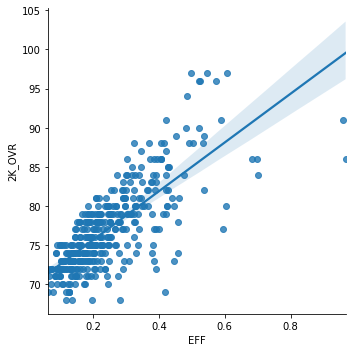

In [194]:
import seaborn as sns

sns.lmplot(x='EFF',y='2K_OVR',data=a,fit_reg=True) 


# COLLEGES ANALYSIS

In [208]:
colcount=pd.DataFrame(fdata.groupby('COLLEGE').PLAYER_NAME.count().sort_values(ascending=False)).drop('None')
colcount

,PLAYER_NAME
COLLEGE,
Kentucky,29
Duke,25
North Carolina,15
Kansas,13
Michigan,12
...,...
Old Dominion,1
Oregon State,1
Penn State,1


In [228]:
fdata.SALARY=fdata.SALARY.astype('float').dropna()

In [232]:
salavg=pd.DataFrame(fdata.groupby('COLLEGE').SALARY.mean().sort_values(ascending=False).round(2).dropna())
salavg

,SALARY
COLLEGE,
Davidson,40231758.0
Butler,32700690.0
Louisiana Tech,30500000.0
Weber State,29802321.0
Lehigh,27556959.0
...,...
South Carolina,277716.0
Colorado State,250000.0
College of Charleston,163356.0


In [238]:
fcol=colcount.join(salavg, on='COLLEGE').dropna()
fcol.sort_values(by='SALARY',ascending=False).head(10)

,PLAYER_NAME,SALARY
COLLEGE,,
Davidson,1,40231758.0
Butler,1,32700690.0
Louisiana Tech,1,30500000.0
Weber State,1,29802321.0
Lehigh,1,27556959.0
Marshall,1,27093018.0
Ohio State,4,19955008.0
Old Dominion,1,19269662.0
Arizona State,2,18977823.5
